# Titanic Dataset Data Analysis

Perform data cleaning and exploratory data analysis (EDA) on a dataset of your choice, such as the Titanic dataset from Kaggle. Explore the relationships between variables and identify patterns and trends in the data.

## Data Understanding

The descriptions of the columns in the data are as follows:

    1. Survived - Survival (0 = No; 1 = Yes)
    2. Pclass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
    3. Name - Name
    4. Sex - Sex
    5. Age - Age
    6. SibSp - Number of Siblings/Spouses Aboard
    7. Parch - Number of Parents/Children Aboard
    8. Ticket - Ticket Number
    9. Fare - Passenger Fare
    10. Cabin - Cabin
    11. Embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

In [38]:
# Importing libraries
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('ggplot')

In [39]:
# Loading data
train_data = pd.read_csv('../PRODIGY_DS_02/titanic_data/train.csv')
test_data = pd.read_csv('../PRODIGY_DS_02/titanic_data/test.csv')


In [40]:
# Viewing the datasets
display(train_data.sample(3))

display(test_data.sample(3))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
404,405,0,3,"Oreskovic, Miss. Marija",female,20.0,0,0,315096,8.6625,NaN,S
142,143,1,3,"Hakkarainen, Mrs. Pekka Pietari (Elin Matilda ...",female,24.0,1,0,STON/O2. 3101279,15.8500,NaN,S
514,515,0,3,"Coleff, Mr. Satio",male,24.0,0,0,349209,7.4958,NaN,S


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
261,1153,3,"Nilsson, Mr. August Ferdinand",male,21.0,0,0,350410,7.8542,NaN,S
147,1039,3,"Davies, Mr. Evan",male,22.0,0,0,SC/A4 23568,8.0500,NaN,S
264,1156,2,"Portaluppi, Mr. Emilio Ilario Giuseppe",male,30.0,0,0,C.A. 34644,12.7375,NaN,C


There is one column missing in the test data, otherwise the merge of the two datasets would be perfect. 

However, this column (Survived) is critical to the study. Therefore, it cannot be ommitted. 

Because of that, only the train data will be used in the analysis.

In [41]:
data=train_data  # Equating train data to data for analysis

In [42]:
# Viewing the data
data.sample(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
24,25,0,3,"Palsson, Miss. Torborg Danira",female,8.0,3,1,349909,21.0750,NaN,S
239,240,0,2,"Hunt, Mr. George Henry",male,33.0,0,0,SCO/W 1585,12.2750,NaN,S
390,391,1,1,"Carter, Mr. William Ernest",male,36.0,1,2,113760,120.0000,B96 B98,S
375,376,1,1,"Meyer, Mrs. Edgar Joseph (Leila Saks)",female,NaN,1,0,PC 17604,82.1708,NaN,C


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Clearly there are missing values in the data

In [44]:
def missing_value_magnitude(data: pd.DataFrame):
    " Takes in a dataframe and Returns a dataframe of the percentage missing values in each column of the dataframe."

    return pd.DataFrame(data.isna().sum() / data.shape[0] * 100, columns=['% missing values'])

In [45]:
display(missing_value_magnitude(data))

,% missing values
PassengerId,0.000000
Survived,0.000000
Pclass,0.000000
Name,0.000000
Sex,0.000000
Age,19.865320
SibSp,0.000000
Parch,0.000000
Ticket,0.000000
Fare,0.000000


The cabin column has a high percentage of missing values. There is no need to fill these missing values and performing analysis on them as the bias would be too high. Dropping the column is a better call.

In [46]:
data.drop('Cabin', axis=1, inplace=True)

In [47]:
# Checking the summary of the distribution of the data
display(data.describe(include=['float', 'int']))

display(data.describe(include='object'))

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


,Name,Sex,Ticket,Embarked
count,891,891,891,889
unique,891,2,681,3
top,"Braund, Mr. Owen Harris",male,347082,S
freq,1,577,7,644


Things to consider:

- Look at the number of people with Age below 1 and the distribution of the column.
- Look for outliers in Fare. There are people with 0 fare? Also check the distribution.
- Why are the significantly less number of tickets than passangers?
- Distribution of the embarked column
- What strategy to adopt in filling missing values based on the findings

In [48]:
# Age column
data[data['Age'] < 1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,S
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,S
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,C
644,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,C
755,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,S
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,C
831,832,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,S


In [49]:
# Creating a function for plotting histograms
def plot_histogram(data: pd.DataFrame, column_name: str):
    """
    Takes in a dataframe and column name and outputs a histogram graph with the median and mean of the variable included
    """
    
    series_name = data[column_name]
    plt.figure(figsize=(12, 6))
    sns.histplot(data=data, x=column_name)
    plt.axvline(x=series_name.median(), color='b', label='Median')  # Median line
    plt.axvline(x=series_name.mean(), color='r', label='Mean')  # Mean line
    plt.title(f"{column_name.title()} histogram")
    plt.legend()
    plt.show()

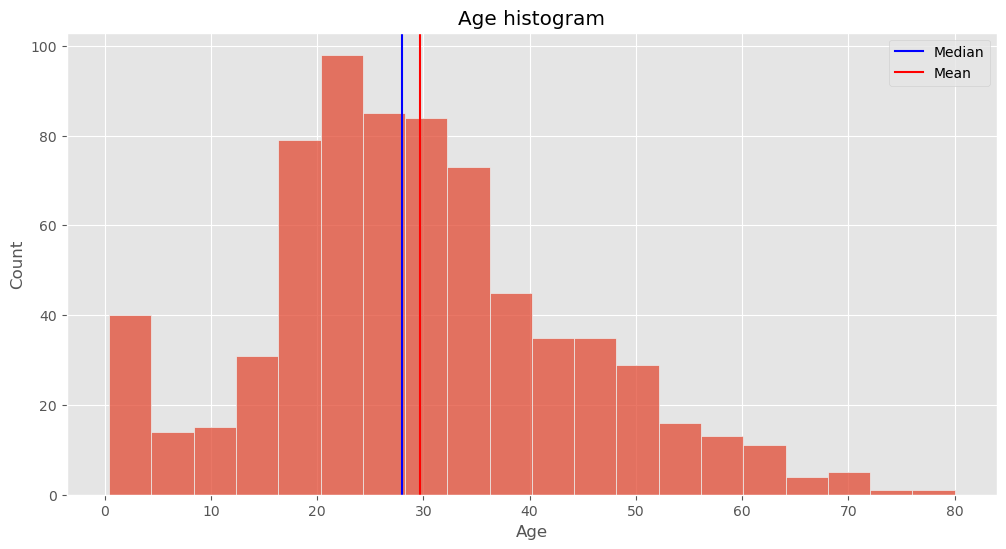

In [50]:
plot_histogram(data, 'Age')  # Age histogram

The least age of passengers on-board the titanic was 2 months.

There is no need of rounding off these values. 

Also, Age column exhibits a normal distribution.

In [51]:
# Fare column
data[data['Fare'] > 100].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,C
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,S
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,C
195,196,1,1,"Lurette, Miss. Elise",female,58.0,0,0,PC 17569,146.5208,C


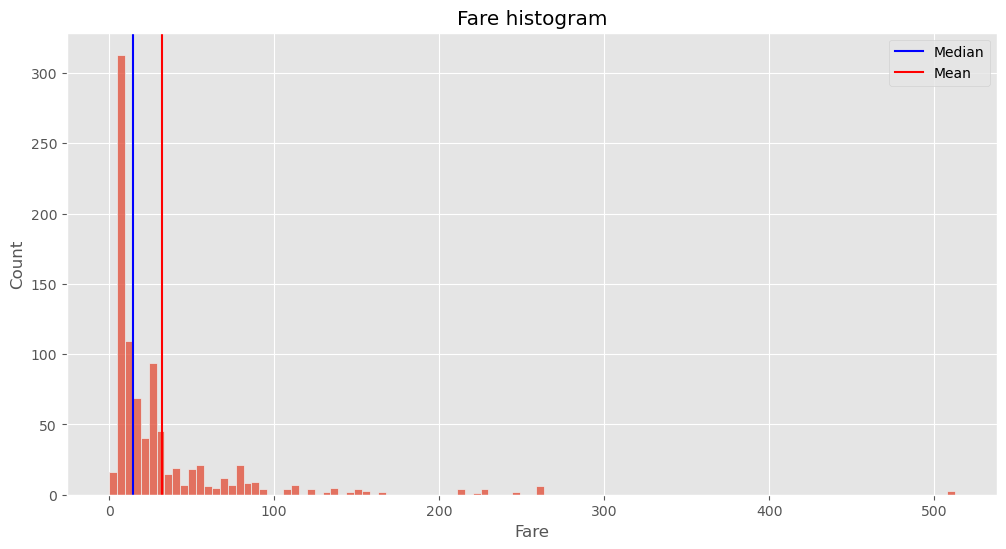

In [52]:
plot_histogram(data, 'Fare')  # Fare histogram

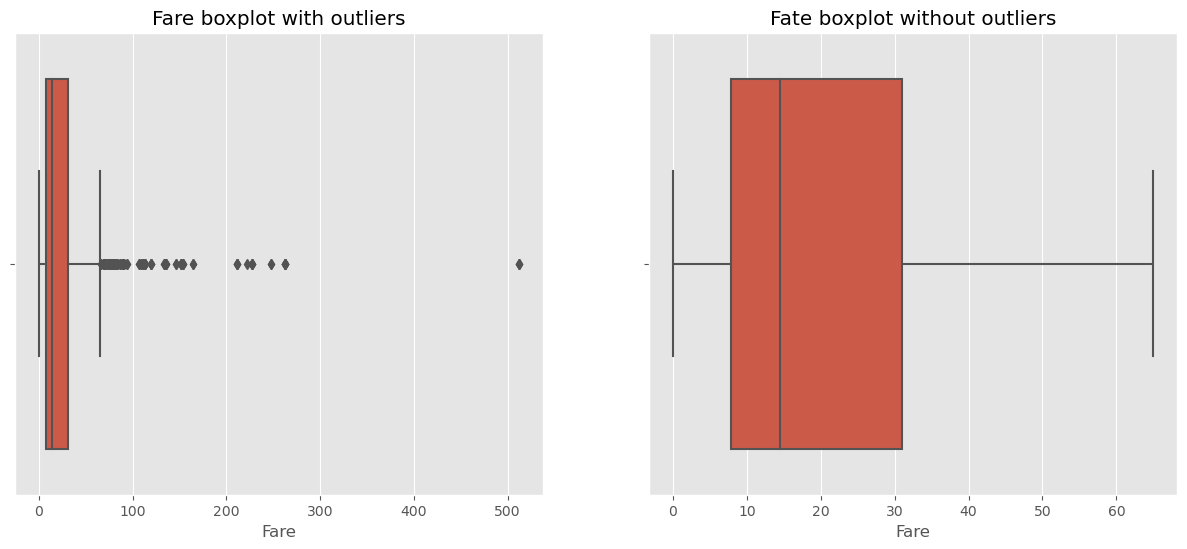

In [53]:
# Boxplot of Fare to detect outliers
fig, ax = plt.subplots(figsize=(15, 6), ncols=2)

sns.boxplot(data=data, x='Fare', showfliers=True, ax=ax[0])
ax[0].set_title("Fare boxplot with outliers")

sns.boxplot(data=data, x='Fare', showfliers=False, ax=ax[1])
ax[1].set_title("Fate boxplot without outliers")
plt.show()

For the passengers with 0 Fare, they all boarded at Southampton and of the male gender. 

The Fare column is highly skewed to the right.

There are a lot of outliers according to the boxplot. They are > 100 and dropping all these records is not ideal. Therefore only values < 300 will be retained. 

In [54]:
# Subsetting records with Fare being less than 300
data = data[data['Fare'] < 300].copy()

In [55]:
# Ticket column
data['Ticket'].value_counts().reset_index().query("count >= 1").head()

,Ticket,count
0,347082,7
1,CA. 2343,7
2,1601,7
3,3101295,6
4,CA 2144,6


In [56]:
data['Ticket'].duplicated().sum() / data.shape[0]

0.23423423423423423

For us to extract any relevant information from the Embarked column, we will have to use it as a pivot and perform analysis of the survival rates. Maybe get weights of filling missing values?

In [57]:
# Embarked column
data[['Embarked', 'Survived']].groupby('Embarked', as_index=False).mean().merge(data['Embarked'].value_counts().reset_index(), on='Embarked', how='left').rename({'count': 'Total Passengers'}, axis=1)

,Embarked,Survived,Total Passengers
0,C,0.545455,165
1,Q,0.389610,77
2,S,0.336957,644


    To NOTE: The order of boarding in the voyage of the Titanic was:
    
     Southampton --> Cherbourg --> Queenstown

There are only two missing values in Embarked, therefore, the mode method will be used to deal with them.

There are ~30% duplicated tickets in the data. Some of the tickets are duplicated up to 5 times and above. 

Based on the simple analysis above, we can decide on how to deal with the missing and duplicated data. This will be done with the following considerations:

1. What is the degree of missing/duplicated data?
2. What sort of what sort of significance does the variable pose to the analysis?

That said, we have 4 variables to consider: Age, Fare, Ticket, and Embarked.

- Ticket shouldn't have that high of a significance in the analysis since its information is represented in other variables such as Pclass and the reset doesn't really matter. We will drop this variable.
- Despite age having ~20% mising data, we will fill it with the median. Because it is sorta normally distributed.
- Fare has a little number of missing values which will be filled by the median.
- Mode method will be used to fill missing values in Embarked column.

In [58]:
# Dropping Ticket column
data.drop('Ticket', axis=1, inplace=True)

In [59]:
# Filling missing values with median
data.fillna({'Age': data['Age'].median(), 'Fare': data['Fare'].median(), 'Embarked': data['Embarked'].mode()[0]}, inplace=True)

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 888 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  888 non-null    int64  
 1   Survived     888 non-null    int64  
 2   Pclass       888 non-null    int64  
 3   Name         888 non-null    object 
 4   Sex          888 non-null    object 
 5   Age          888 non-null    float64
 6   SibSp        888 non-null    int64  
 7   Parch        888 non-null    int64  
 8   Fare         888 non-null    float64
 9   Embarked     888 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 76.3+ KB


All missing values are dealt with. However, the variables data types need to be corrected.

In [61]:
# Correcting datatypes
data['Pclass'] = data['Pclass'].astype(dtype='object')
data['SibSp'] = data['SibSp'].astype(dtype='object')
data['Parch'] = data['Parch'].astype(dtype='object')



## Exploratory Data Analysis (EDA)

In [62]:
# Dropping Name and PassengerId columns as they add no value to the analysis
data.drop(['Name', 'PassengerId'], axis=1, inplace=True)

In [63]:
data.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S


In [64]:
# Creating a pivot table function for survival rates
def survival_pivot_table(values: str, index: str | list, columns: str=None, data=data):
    """
    Creates a pivot table for the variables in the dataset used in this project
    """
    table = pd.pivot_table(data, values=values, index=index, columns=columns, aggfunc=['mean', 'count'])

    display(table)

In [65]:
# Pivot table for survival rates based on sex
survival_pivot_table(values='Survived', index='Sex')

# Pivot table for survival rates based on passenger class
survival_pivot_table(values='Survived', index='Pclass')

# Pivot table for Passenger class and sex 
survival_pivot_table(values='Survived', index='Pclass', columns='Sex')

# Pivot table for survival rates based on port of embarkation
survival_pivot_table(values='Survived', index='Embarked')

# Pivot table for survival rates based on port of embarkation and sex
survival_pivot_table(values='Survived', index='Embarked', columns='Sex')

,mean,count
,Survived,Survived
Sex,,
female,0.741214,313
male,0.186087,575


,mean,count
,Survived,Survived
Pclass,,
1,0.624413,213
2,0.472826,184
3,0.242363,491


mean            count     
Sex       female      male female male
Pclass                                
1       0.967742  0.358333     93  120
2       0.921053  0.157407     76  108
3       0.500000  0.135447    144  347

,mean,count
,Survived,Survived
Embarked,,
C,0.545455,165
Q,0.389610,77
S,0.339009,646


mean            count     
Sex         female      male female male
Embarked                                
C         0.875000  0.290323     72   93
Q         0.750000  0.073171     36   41
S         0.692683  0.174603    205  441

It is clear that the passenger class and sex of a passenger highly affected their survival rate.

1. 1st class passengers had a high chance of survival as compared to 2nd and 3rd class passengers.
2. Female passengers had a high survival rates than male passengers.

As much as port of embarkation had different survival rates, it does not seem to be as significant as the class and sex of a passenger. However, the males that boarded at Queenstown had less than 10% survival rates which stands out. 

In [66]:
# Pivot table for survival based on SibSp
survival_pivot_table(values='Survived', index='SibSp')

# Pivot table for survival based on SibSp
survival_pivot_table(values='Survived', index='Parch')

,mean,count
,Survived,Survived
SibSp,,
0,0.342149,605
1,0.535885,209
2,0.464286,28
3,0.250000,16
4,0.166667,18
5,0.000000,5
8,0.000000,7


,mean,count
,Survived,Survived
Parch,,
0,0.341716,676
1,0.547009,117
2,0.500000,80
3,0.600000,5
4,0.000000,4
5,0.200000,5
6,0.000000,1


For both 'Siblings and Spouses' and 'Parents and Children' on board, passengers with a very high number of either (>4) had less possibility of survival as well as those with No counterpart on board (When compared to the others with low number of either category on board).

`For those with high number - There could been have been a lower survival dues to difficulty in deciding who to leave behind or save. While for the ones with No counterpart on board, their lower survival rates could have been due to the lack of some of someone to 'take care of them'.`

Aside from Sex and passenger class, the Age of a passenger is likely to be a major factor contibuting to the survival of a passenger. Therefore, it is worth looking at it. 

We will have to segment the Ages into classes: These are: 

1. Children - 0-18
2. Youth - 18-35
3. Middle-aged - 35-60
4. Elderly - 60 and above

In [67]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [68]:
# Creating agegroup column with empty string 
data['AgeGroup'] = ''

# Creating the age group segments
data.loc[data['Age'] < 18, 'AgeGroup'] = 'Child'
data.loc[(data['Age'] >= 18) & (data['Age'] < 35), 'AgeGroup'] = 'Youth'
data.loc[(data['Age'] >= 35) & (data['Age'] < 60), 'AgeGroup'] = 'Middle Age'
data.loc[data['Age'] >= 60, 'AgeGroup'] = 'Elderly'

# Checking distribution in AgeGroup column
data['AgeGroup'].value_counts()


AgeGroup
Youth         543
Middle Age    206
Child         113
Elderly        26
Name: count, dtype: int64

In [69]:
# Pivot table for survival rates based on age group
survival_pivot_table(values='Survived', index='AgeGroup')

,mean,count
,Survived,Survived
AgeGroup,,
Child,0.539823,113
Elderly,0.269231,26
Middle Age,0.407767,206
Youth,0.344383,543


Age did have an impact of the survival rate. Children had a high rate of survival with 1 of 2 children surviving while the elderly had a small chance of survival with about 1 of 4 elderly passengers surviving.

In [72]:
# Survival rates in general in the Titanic
data['Survived'].value_counts(normalize=True)

Survived
0    0.618243
1    0.381757
Name: proportion, dtype: float64

In [90]:
# Pivot table for survival rates based on Sex
data['SurvivedClass'] = data['Survived'].astype('object')

data.groupby(by=['SurvivedClass', 'Sex'])['Survived'].count()

SurvivedClass  Sex   
0              female     81
               male      468
1              female    232
               male      107
Name: Survived, dtype: int64

In [95]:
print(f"Percentage of Women out of all passengers that survived: {round((232 / (232+107)), 4)}")

Percentage of Women out of all passengers that survived: 0.6844


## Conclusions

- In general there was a ~38% survival rate in the Titanic.
- Out of all passengers that survived ~68% of them were women.
- The higher the passenger class the higher the chance of survival was.
- Children (passengers below age 18) had the highest survival rate out of all other age groups.
- For both 'Siblings and Spouses' and 'Parents and Children' on board; passengers with a very high number (>4) of either had less possibility of survival as well as those with No counterpart on board (When compared to the others with low number of either category on board).
- The males that boarded at Queenstown had less than 10% survival rates.
- Passengers who boarded from Cherboug had the highest survival rates.